                            Customer Segmentation
# Plan

    I)Importation des libraries

    II)Chargement des données

    III)Analyses exploratoire

    IV)Notoyages des données

    V)Réduction de dimentionnalité
    
    VI)Clustering
    
        Clustering a k-means
        
        Clustering avec la méthode de la silhouette
        
    VII)Evaluation des modéles
    
        LinearSVC
        
        Logostic Regression
        
        k-Nearest Neighbors
        
        KNeighbors avec manhattan
        
        Random Forest
        
        Gradient Boosting
        
        Baggin
        

Conclusion


In [1]:
!pip install yellowbrick

#  I) ANALYSE EXOPLORATOIRE
cette partie consiste a importer les libreries necessaires et au chargement des donnees ainsi que l'analyse statistque des données  

## 1) IMPORTING LIBRARIES (IMPORTATION DES DONNEES)

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib as mat
import matplotlib.patches as mpatches
from sklearn.ensemble import IsolationForest
from sklearn. model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


## LOADING DATA(chargement des données)

In [2]:
import os
os.getcwd()

'C:\\Users\\Hp\\OneDrive\\Bureau\\IMPORT ISE2\\Initiation au big data et au cloud campiting'

In [3]:
os.chdir(r'C:\Users\Hp\OneDrive\Bureau\IMPORT ISE2\Initiation au big data et au cloud campiting\LES DONNEES DU PROJET')

In [4]:
data1=pd.read_csv('olist_customers_dataset.csv')
data8=pd.read_csv('olist_geolocation_dataset.csv')
data9=pd.read_csv('olist_order_items_dataset.csv')
data3=pd.read_csv('olist_order_payments_dataset.csv')
data4=pd.read_csv('olist_order_reviews_dataset.csv')
data2=pd.read_csv('olist_orders_dataset.csv')
data5=pd.read_csv('olist_products_dataset.csv')
data6=pd.read_csv('olist_sellers_dataset.csv')

In [5]:
sources = [data1, data2, data3, 
           data4, data5, data6, data8 ,data9]
names =["data1","data2","data3","data4","data5","data6","data8","data9"]

In [6]:
# prejetons pour voir nos differntes variable dans chaque base
d = {}
for i in range(len(sources)):
    d["{}".format(names[i])] = pd.Series(list(sources[i].columns))

D = pd.DataFrame.from_dict(d).fillna("")
D

data1                          data2  \
0               customer_id                       order_id   
1        customer_unique_id                    customer_id   
2  customer_zip_code_prefix                   order_status   
3             customer_city       order_purchase_timestamp   
4            customer_state              order_approved_at   
5                             order_delivered_carrier_date   
6                            order_delivered_customer_date   
7                            order_estimated_delivery_date   
8                                                            

                  data3                    data4                       data5  \
0              order_id                review_id                  product_id   
1    payment_sequential                 order_id       product_category_name   
2          payment_type             review_score         product_name_lenght   
3  payment_installments     review_comment_title  product_description_lenght   
4         payment_value   review_comment_message          product_photos_qty   
5                           review_creation_date            product_weight_g   
6                        review_answer_timestamp           product_length_cm   
7                                                          product_height_cm   
8                                                           product_width_cm   

                    data6                        data8                data9  
0               seller_id  geolocation_zip_code_prefix             order_id  
1  seller_zip_code_prefix              geolocation_lat        order_item_id  
2             seller_city              geolocation_lng           product_id  
3            seller_state             geolocation_city            seller_id  
4                                    geolocation_state  shipping_limit_date  
5                                                                     price  
6                                                             freight_value  
7                                                                            
8

#nous allons merger la base selon les variables qu'ils on en cummun

In [6]:
base_fision=pd.merge(data1,data2,on='customer_id')

In [7]:
base_fision1=pd.merge(base_fision,data3, on ="order_id")

In [8]:
base_fision2=pd.merge(base_fision1,data4, on ="order_id")

In [9]:
base_fision3=pd.merge(base_fision2,data9, on ="order_id")

In [10]:
base_fision4=pd.merge(base_fision3,data5, on ="product_id")

In [11]:
base_fision5=pd.merge(base_fision4,data6, on ="seller_id")

In [12]:
base_fision5=pd.merge(base_fision4,data6, on ="seller_id")

In [13]:
base_fision5.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0                     14409           franca             SP   
1                     68030         santarem             PA   
2                     68030         santarem             PA   
3                     92480  nova santa rita             RS   
4                     25931             mage             RJ   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
2  c1d2b34febe9cd269e378117d6681172    delivered      2017-11-09 00:50:13   
3  b1a5d5365d330d10485e0203d54ab9e8    delivered      2017-05-07 20:11:26   
4  2e604b3614664aa66867856dba7e61b7    delivered      2018-02-03 19:45:40   

     order_approved_at order_delivered_carrier_date  ... product_name_lenght  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57  ...                41.0   
1  2017-11-10 00:47:48          2017-11-22 01:43:37  ...                41.0   
2  2017-11-10 00:47:48          2017-11-22 01:43:37  ...                41.0   
3  2017-05-08 22:22:56          2017-05-19 20:16:31  ...                41.0   
4  2018-02-04 22:29:19          2018-02-19 18:21:47  ...                41.0   

  product_description_lenght  product_photos_qty product_weight_g  \
0                     1141.0                 1.0           8683.0   
1                     1141.0                 1.0           8683.0   
2                     1141.0                 1.0           8683.0   
3                     1141.0                 1.0           8683.0   
4                     1141.0                 1.0           8683.0   

   product_length_cm  product_height_cm product_width_cm  \
0               54.0               64.0             31.0   
1               54.0               64.0             31.0   
2               54.0               64.0             31.0   
3               54.0               64.0             31.0   
4               54.0               64.0             31.0   

   seller_zip_code_prefix      seller_city seller_state  
0                    8577  itaquaquecetuba           SP  
1                    8577  itaquaquecetuba           SP  
2                    8577  itaquaquecetuba           SP  
3                    8577  itaquaquecetuba           SP  
4                    8577  itaquaquecetuba           SP  

[5 rows x 39 columns]

In [13]:
print(base_fision5.shape)

(117329, 39)


In [154]:
# la description des variable  
base_fision5.describe()

customer_zip_code_prefix  payment_sequential  payment_installments  \
count             117329.000000       117329.000000         117329.000000   
mean               35060.118112            1.094452              2.940151   
std                29849.496175            0.731174              2.775370   
min                 1003.000000            1.000000              0.000000   
25%                11250.000000            1.000000              1.000000   
50%                24240.000000            1.000000              2.000000   
75%                58770.000000            1.000000              4.000000   
max                99990.000000           29.000000             24.000000   

       payment_value   review_score  order_item_id          price  \
count  117329.000000  117329.000000  117329.000000  117329.000000   
mean      172.062565       4.031467       1.194121     120.524349   
std       265.388194       1.387927       0.684225     182.944843   
min         0.000000       1.000000       1.000000       0.850000   
25%        60.750000       4.000000       1.000000      39.900000   
50%       108.100000       5.000000       1.000000      74.900000   
75%       189.060000       5.000000       1.000000     134.900000   
max     13664.080000       5.000000      21.000000    6735.000000   

       freight_value  product_name_lenght  product_description_lenght  \
count  117329.000000        115634.000000               115634.000000   
mean       20.027514            48.768018                  785.802861   
std        15.828077            10.033831                  652.382965   
min         0.000000             5.000000                    4.000000   
25%        13.080000            42.000000                  346.000000   
50%        16.280000            52.000000                  600.000000   
75%        21.180000            57.000000                  983.000000   
max       409.680000            76.000000                 3992.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count       115634.000000     117309.000000      117309.000000   
mean             2.205528       2110.763062          30.254456   
std              1.717783       3785.128931          16.177519   
min              1.000000          0.000000           7.000000   
25%              1.000000        300.000000          18.000000   
50%              1.000000        700.000000          25.000000   
75%              3.000000       1800.000000          38.000000   
max             20.000000      40425.000000         105.000000   

       product_height_cm  product_width_cm  seller_zip_code_prefix  
count      117309.000000     117309.000000           117329.000000  
mean           16.612476         23.071452            24450.781955  
std            13.452625         11.745875            27582.364358  
min             2.000000          6.000000             1001.000000  
25%             8.000000         15.000000             6429.000000  
50%            13.000000         20.000000            13660.000000  
75%            20.000000         30.000000            28035.000000  
max           105.000000        118.000000            99730.000000

In [84]:
# la description de toutes nos variables 
base_fision5.describe(include='all')

customer_id                customer_unique_id  \
count                             117329                            117329   
unique                             97916                             94720   
top     270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
freq                                  63                                75   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  \
count              117329.000000        117329         117329   
unique                       NaN          4108             27   
top                          NaN     sao paulo             SP   
freq                         NaN         18582          49527   
mean                35060.118112           NaN            NaN   
std                 29849.496175           NaN            NaN   
min                  1003.000000           NaN            NaN   
25%                 11250.000000           NaN            NaN   
50%                 24240.000000           NaN            NaN   
75%                 58770.000000           NaN            NaN   
max                 99990.000000           NaN            NaN   

                                order_id order_status  \
count                             117329       117329   
unique                             97916            7   
top     895ab968e7bb0d5659d16cd74cd1650c    delivered   
freq                                  63       114859   
mean                                 NaN          NaN   
std                                  NaN          NaN   
min                                  NaN          NaN   
25%                                  NaN          NaN   
50%                                  NaN          NaN   
75%                                  NaN          NaN   
max                                  NaN          NaN   

       order_purchase_timestamp    order_approved_at  \
count                    117329               117314   
unique                    97370                89533   
top         2017-08-08 20:26:31  2017-08-08 20:43:31   
freq                         63                   63   
mean                        NaN                  NaN   
std                         NaN                  NaN   
min                         NaN                  NaN   
25%                         NaN                  NaN   
50%                         NaN                  NaN   
75%                         NaN                  NaN   
max                         NaN                  NaN   

       order_delivered_carrier_date  ... product_name_lenght  \
count                        116094  ...       115634.000000   
unique                        80449  ...                 NaN   
top             2017-08-10 11:58:14  ...                 NaN   
freq                             63  ...                 NaN   
mean                            NaN  ...           48.768018   
std                             NaN  ...           10.033831   
min                             NaN  ...            5.000000   
25%                             NaN  ...           42.000000   
50%                             NaN  ...           52.000000   
75%                             NaN  ...           57.000000   
max                             NaN  ...           76.000000   

       product_description_lenght  product_photos_qty product_weight_g  \
count               115634.000000       115634.000000    117309.000000   
unique                        NaN   

<AxesSubplot:ylabel='None'>

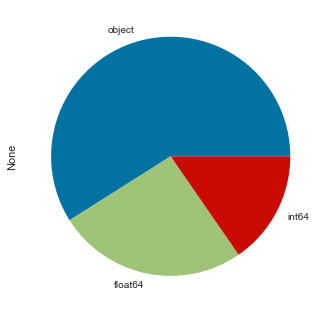

In [78]:
#les types de variable dans la base 
base_fision5.dtypes.value_counts().plot.pie()

<AxesSubplot:>

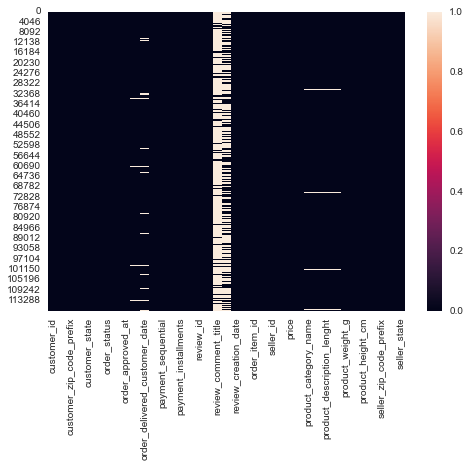

In [79]:
# abservation des variables dans la base
sns.heatmap(base_fision5.isna())

# DATA CLEANING (NETOYAGE DES DONNEES)

In [17]:
pd.DataFrame(base_fision5).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117329 non-null  object 
 1   customer_unique_id             117329 non-null  object 
 2   customer_zip_code_prefix       117329 non-null  int64  
 3   customer_city                  117329 non-null  object 
 4   customer_state                 117329 non-null  object 
 5   order_id                       117329 non-null  object 
 6   order_status                   117329 non-null  object 
 7   order_purchase_timestamp       117329 non-null  object 
 8   order_approved_at              117314 non-null  object 
 9   order_delivered_carrier_date   116094 non-null  object 
 10  order_delivered_customer_date  114858 non-null  object 
 11  order_estimated_delivery_date  117329 non-null  object 
 12  payment_sequential            

In [18]:
columns_nan_info={}
for column in base_fision5.keys():
    nan_count=base_fision5[column].isnull().sum()
    columns_nan_info[column]=nan_count/base_fision5.shape[0]*100
df_columns_nan_info= pd.DataFrame(data=np.array(list(columns_nan_info.items())),columns=['column','nan%'])
df_columns_nan_info['nan%']=pd.to_numeric(df_columns_nan_info['nan%'])
df_colums_nan_info=df_columns_nan_info.sort_values(by=['nan%'])

print(df_columns_nan_info.shape)

with pd.option_context('display.max_row',None,'display.max_columns',None):
    print(df_columns_nan_info)

(39, 2)
                           column       nan%
0                     customer_id   0.000000
1              customer_unique_id   0.000000
2        customer_zip_code_prefix   0.000000
3                   customer_city   0.000000
4                  customer_state   0.000000
5                        order_id   0.000000
6                    order_status   0.000000
7        order_purchase_timestamp   0.000000
8               order_approved_at   0.012785
9    order_delivered_carrier_date   1.052596
10  order_delivered_customer_date   2.106044
11  order_estimated_delivery_date   0.000000
12             payment_sequential   0.000000
13                   payment_type   0.000000
14           payment_installments   0.000000
15                  payment_value   0.000000
16                      review_id   0.000000
17                   review_score   0.000000
18           review_comment_title  88.159790
19         review_comment_message  57.658379
20           review_creation_date   0.000000
21

In [14]:
base_fision5=base_fision5.drop(['review_comment_title',
                                'review_comment_message',
                                'customer_zip_code_prefix',
                                'review_id','seller_id','order_id'], axis=1)

In [15]:
base_fision5=base_fision5.dropna()

In [16]:
len(base_fision5)

113216

In [19]:
columns_nan_info={}
for column in base_fision5.keys():
    nan_count=base_fision5[column].isnull().sum()
    columns_nan_info[column]=nan_count/base_fision5.shape[0]*100
df_columns_nan_info= pd.DataFrame(data=np.array(list(columns_nan_info.items())),columns=['column','nan%'])
df_columns_nan_info['nan%']=pd.to_numeric(df_columns_nan_info['nan%'])
df_colums_nan_info=df_columns_nan_info.sort_values(by=['nan%'])

print(df_columns_nan_info.shape)

with pd.option_context('display.max_row',None,'display.max_columns',None):
    print(df_columns_nan_info)

(37, 2)
                           column  nan%
0                     customer_id   0.0
1              customer_unique_id   0.0
2        customer_zip_code_prefix   0.0
3                   customer_city   0.0
4                  customer_state   0.0
5                        order_id   0.0
6                    order_status   0.0
7        order_purchase_timestamp   0.0
8               order_approved_at   0.0
9    order_delivered_carrier_date   0.0
10  order_delivered_customer_date   0.0
11  order_estimated_delivery_date   0.0
12             payment_sequential   0.0
13                   payment_type   0.0
14           payment_installments   0.0
15                  payment_value   0.0
16                      review_id   0.0
17                   review_score   0.0
18           review_creation_date   0.0
19        review_answer_timestamp   0.0
20                  order_item_id   0.0
21                     product_id   0.0
22                      seller_id   0.0
23            shipping_limit_dat

In [206]:
print('Entrées dupliquées: {}'.format(base_fision5.duplicated().sum()))
base_fision5.drop_duplicates(inplace = True)

Entrées dupliquées: 0


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

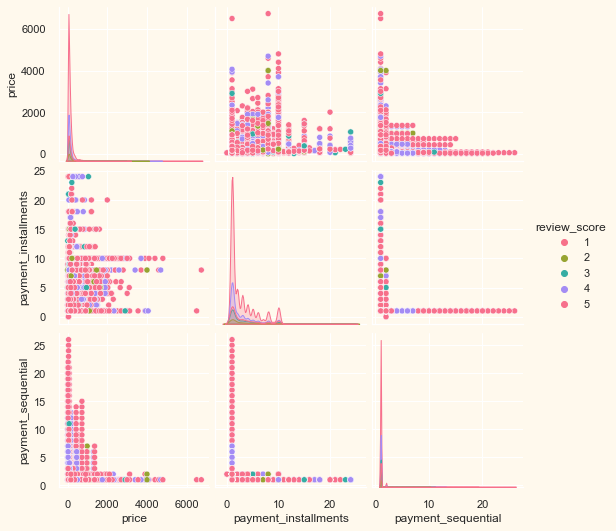

In [34]:
from matplotlib.colors import ListedColormap
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "order_status", "seller_state", "price", "review_score", "payment_installments", "payment_sequential"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(base_fision5[To_Plot], hue= "review_score",palette='husl')
#Taking hue 
plt.show()

<AxesSubplot:>

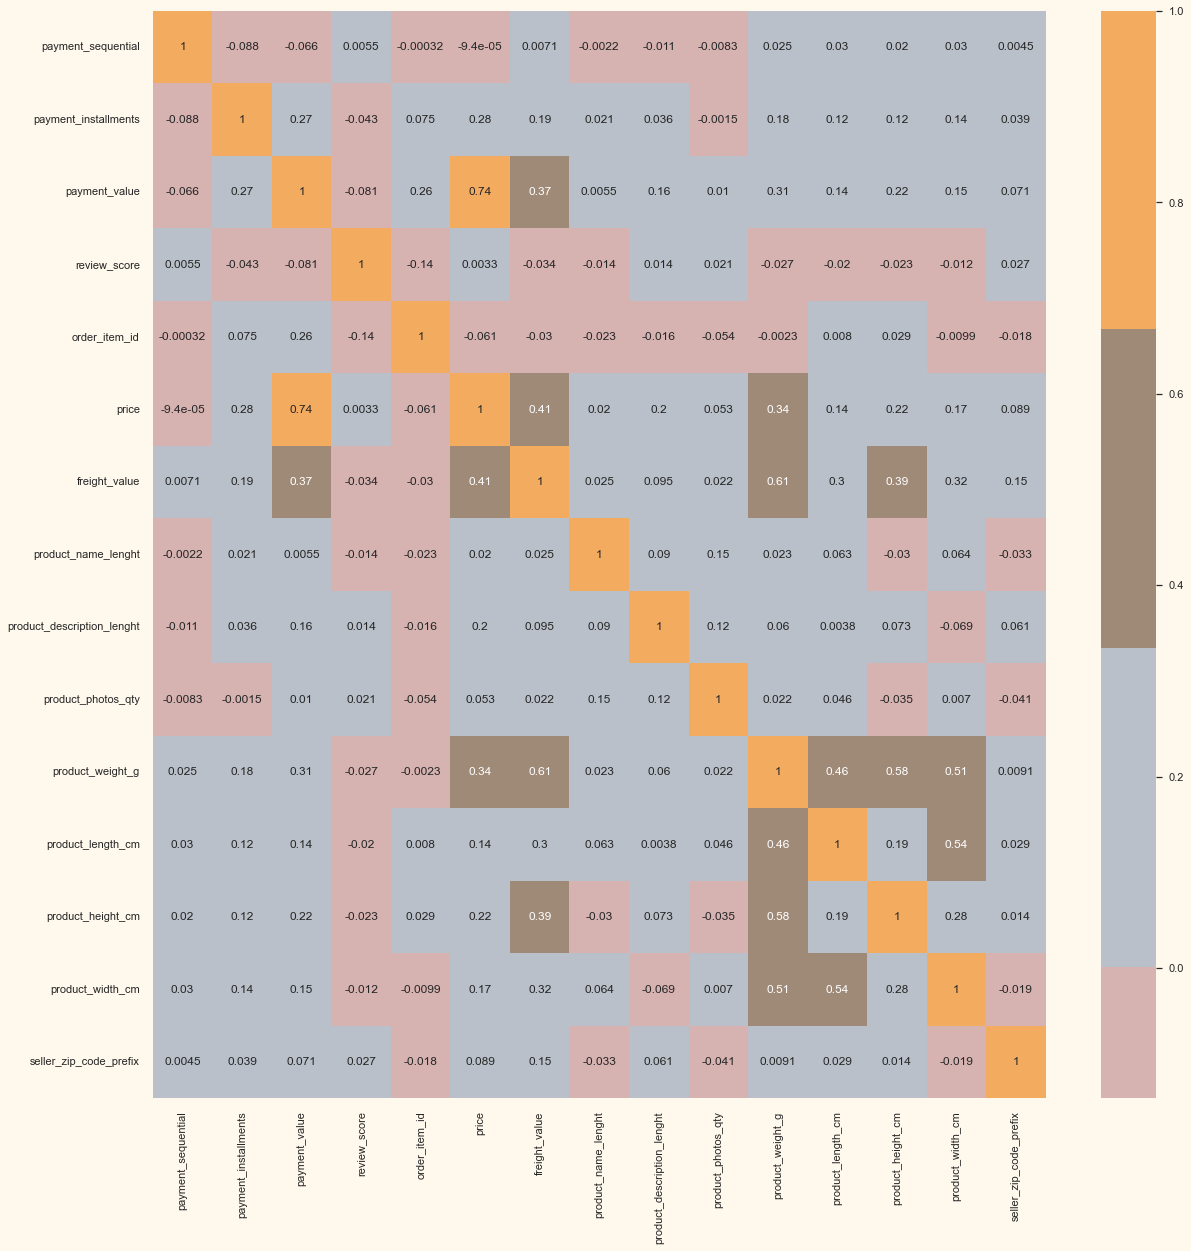

In [35]:
# la matrice de correlation entre nos differentes variables
corrmat= base_fision5.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap,center=0, vmin=None, vmax=None)

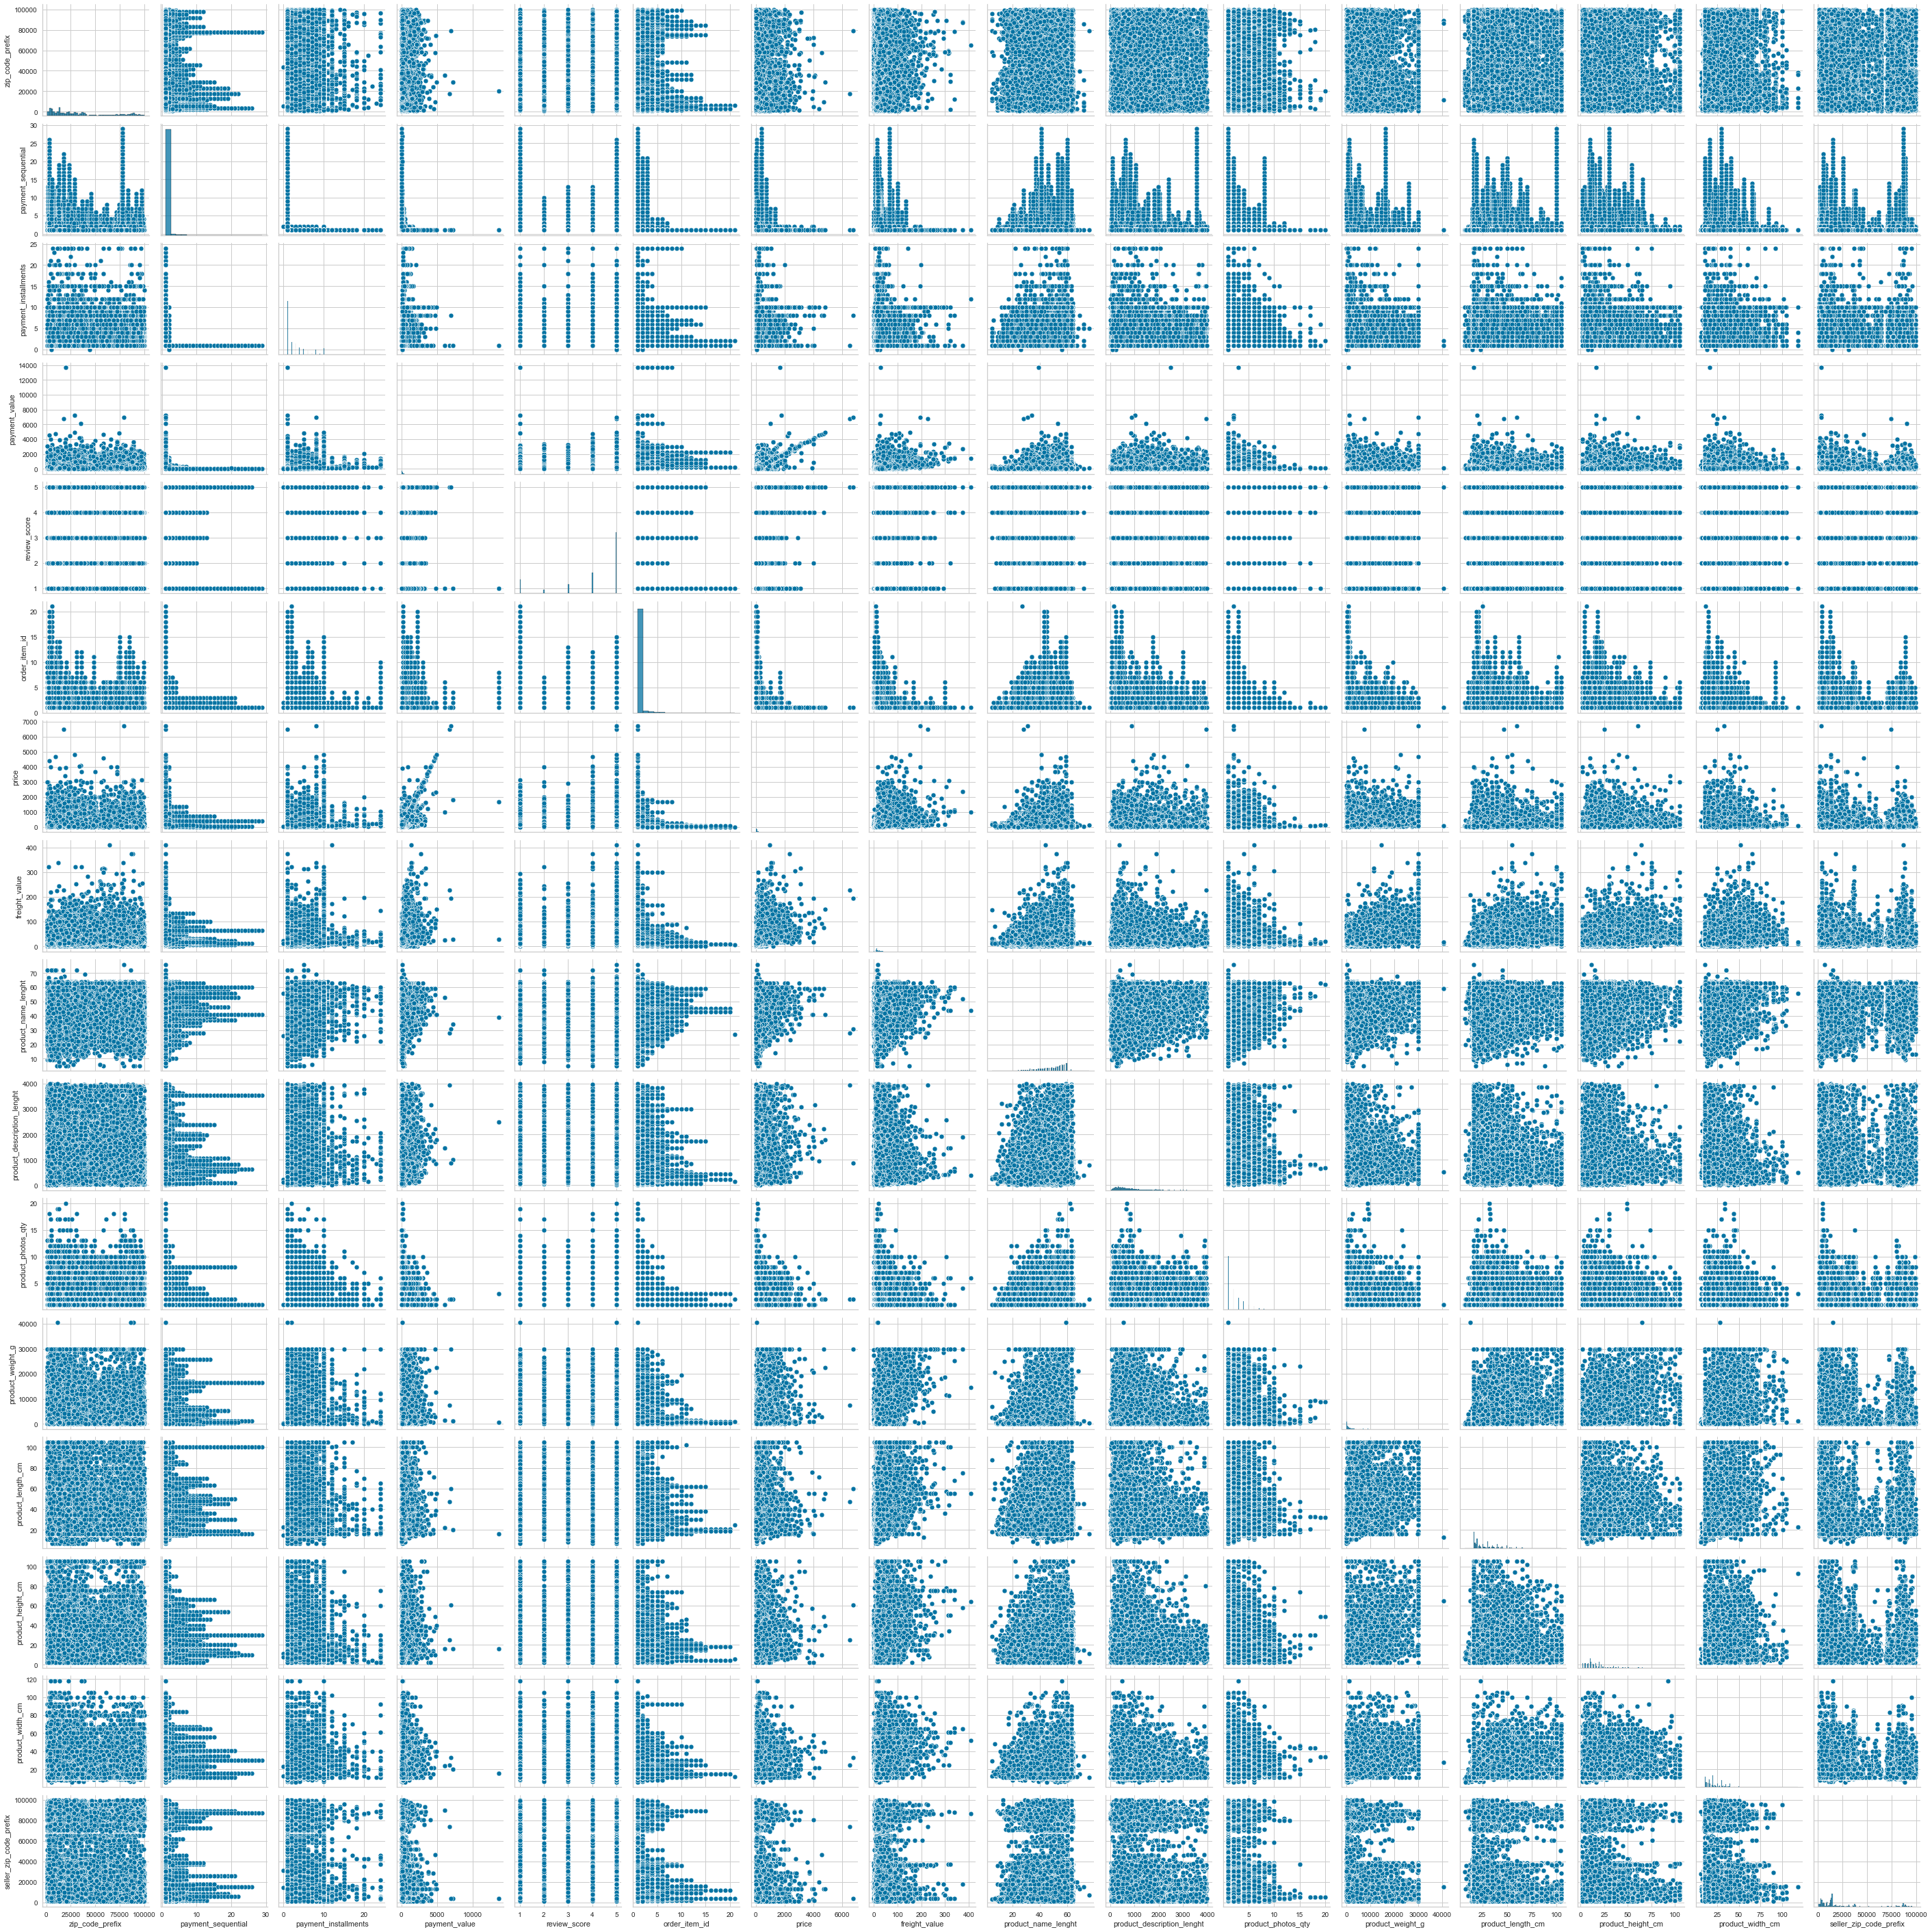

In [ ]:
sns.pairplot(base_fision5)

# DATA PREPROCESSING (pretaraitement des donnees)

# encodage des lobjet dtype  
#dans cette partie il consiste a predefinir les données qui sont a notre et de redefinir les #variables afin  de les affecter des valeurs qui sont numerique 

In [ ]:
#liste des variables categorielle pour les convertire en numerique

In [17]:
s = (base_fision5.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)


Categorical variables in the dataset: ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'payment_type', 'review_creation_date', 'review_answer_timestamp', 'product_id', 'shipping_limit_date', 'product_category_name', 'seller_city', 'seller_state']


dans notre base il extiste des variable du types object donc il est impossible de faire leur traitement. pour les traiter nous allons les transfofer par l'encodages
il existe 5 module qui perment de faire cette encodages

In [18]:
LE=LabelEncoder()
for i in object_cols:
    base_fision5[i]=base_fision5[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [19]:
base_fision5.head(10)

customer_id  customer_unique_id  customer_city  customer_state  \
0         2494               47960           1368              25   
1        50513               56772           3330              13   
2        50513               56772           3330              13   
3        88993               21676           2506              22   
4        39635               12663           2143              18   
5        93450               30991            177              23   
6        92974               87264           1031              10   
7         5992               41761           3977              12   
8        10491               24037            448              10   
9        12095               17646           3295              10   

   order_status  order_purchase_timestamp  order_approved_at  \
0             1                      8924               8662   
1             1                     31099              30391   
2             1                     31099              30391   
3             1                      7960               7846   
4             1                     49780              47458   
5             1                      4363               4258   
6             1                      8881               8732   
7             1                      3971               3910   
8             1                     58667              55479   
9             1                     48056              46359   

   order_delivered_carrier_date  order_delivered_customer_date  \
0                          8763                           8676   
1                         30364                          32047   
2                         30364                          32047   
3                          8541                           8828   
4                         48989                          51733   
5                          4253                           4802   
6                          8757                           9092   
7                          4132                           9216   
8                         57170                          59564   
9                         47369                          49633   

   order_estimated_delivery_date  ...  product_name_lenght  \
0                            106  ...                 41.0   
1                            241  ...                 41.0   
2                            241  ...                 41.0   
3                            111  ...                 41.0   
4                            302  ...                 41.0   
5                             77  ...                 41.0   
6                            108  ...                 41.0   
7                             80  ...                 41.0   
8                            321  ...                 41.0   
9                            294  ...                 41.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                      1141.0                 1.0            8683.0   
1                      1141.0                 1.0            8683.0   
2                      1141.0                 1.0            8683.0   
3                      1141.0                 1.0            8683.0   
4                      1141.0                 1.0            8683.0   
5                      1141.0                 1.0            8683.0   
6                      1141.0                 1.0            8683.0   
7                      1141.0                 1.0            8683.0   
8                      1141.0                 1.0            8683.0   
9                      1141.0                 1.0            8683.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               54.0               64.0              31.0   
1               54.0               64.0              31.0   
2               54.0               64.0              31.0   
3               54.0               64.0              31.0   
4               54.0               64.0  

nous savons que la connaissance de certain variable nr nous aide en rien dans notre prediction nous allons les supprimer

# DIMENSIONALITY REDUCTION

In [20]:
base_pca=base_fision5

In [21]:
data_reduct=base_pca

In [22]:
scaler = StandardScaler()
data_reduct=scaler.fit_transform(base_fision5)
type(data_reduct)

numpy.ndarray

In [23]:
# Sauvegarde du tableau numpy base
np.save('training_data.npy',data_reduct)

In [24]:
pca = PCA(n_components = 2)
resultat_pca = pca.fit_transform(data_reduct)
type(resultat_pca)

numpy.ndarray

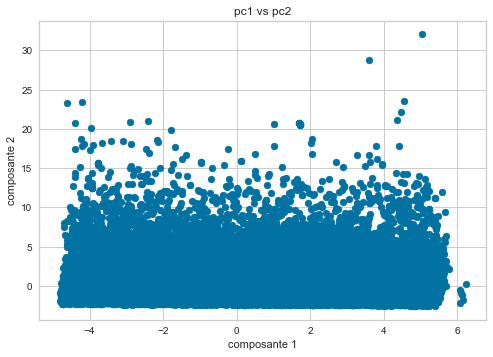

In [25]:
plt.scatter(resultat_pca[:, 0],resultat_pca[:,1])
plt.xlabel("composante 1")
plt.ylabel("composante 2")
plt.title("pc1 vs pc2")
plt.show()

In [45]:
pearsonr(resultat_pca[:, 0],resultat_pca[:,1])

(0.0, 0.9999999999746602)

In [46]:
base_fision5 = np.load('training_data.npy')

# CLUSTERING  DES K-MEANS METHODE DU COUDE

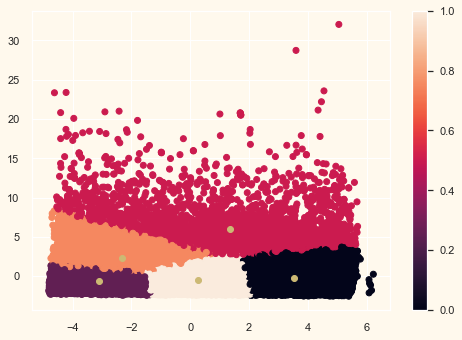

In [47]:
#for col_name in len(base_fision5):
kmeans=KMeans(n_clusters=5)
kmeans.fit(resultat_pca)
kmeans.predict(resultat_pca)
plt.scatter(resultat_pca[:,0],resultat_pca[:,1],c=kmeans.predict(resultat_pca))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='y')
kmeans.score(resultat_pca)
plt.colorbar()
# la valeur retourner donne la distance entre les points d'un cluster

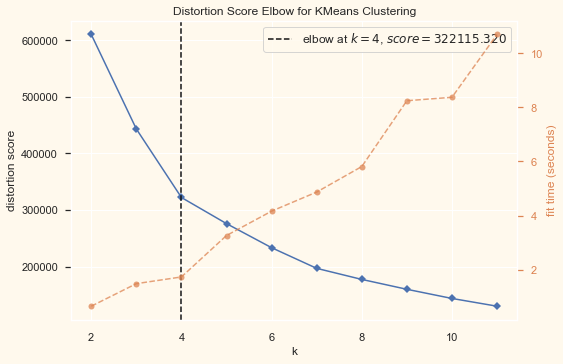

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kmeans=KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 12))
visualizer.fit(resultat_pca)
visualizer.show()

# cluster avec l'algorithme DBSCAN

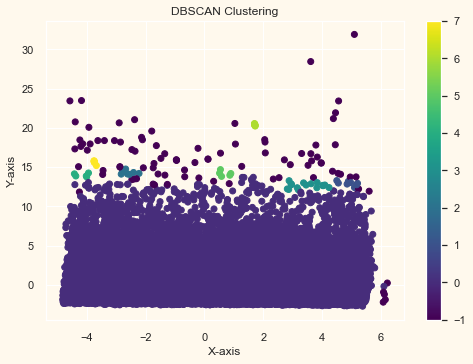

In [45]:
# Generate some random data
#base5 = np.random.rand(100, 2)
 
# Create a DBSCAN model
model = DBSCAN(eps=0.5, min_samples=5)
 
# Fit the model to the data
model.fit(resultat_pca)
 
# Get the labels for each point
labels = model.labels_
 
# Create a scatter plot of the data
plt.scatter(resultat_pca[:,0], resultat_pca[:,1], c=labels, cmap='viridis')
 
# Add a color bar
plt.colorbar()
 
# Add a title and axis labels
plt.title('DBSCAN Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
 
# Show the plot
plt.show()


In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = 4
matrix = resultat_pca
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 4 The average silhouette_score is : 0.4142417283868708


In [25]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

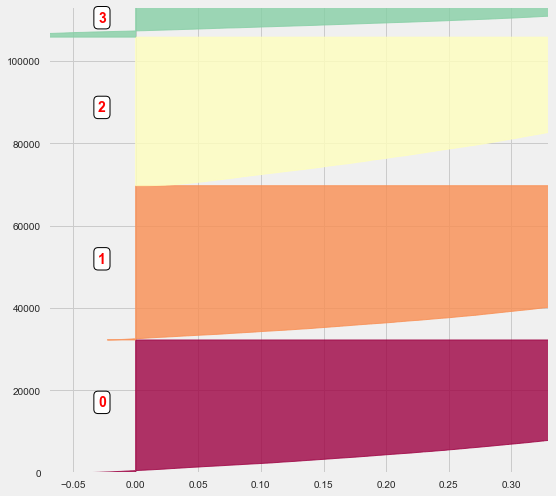

In [26]:
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(base_fision5), sample_silhouette_values, clusters)

** c / _Analyse des Composantes Principales_ **

Afin de s'assurer que ces clusters sont vraiment distincts, je regarde leur composition. Étant donné le grand nombre de variables de la matrice initiale, je réalise d'abord une ACP :

In [41]:
pca = PCA()
pca.fit(base_fision5)
pca_samples = pca.transform(base_fision5)

et ensuite vérifier la quantité de variance expliquée par chaque composant 

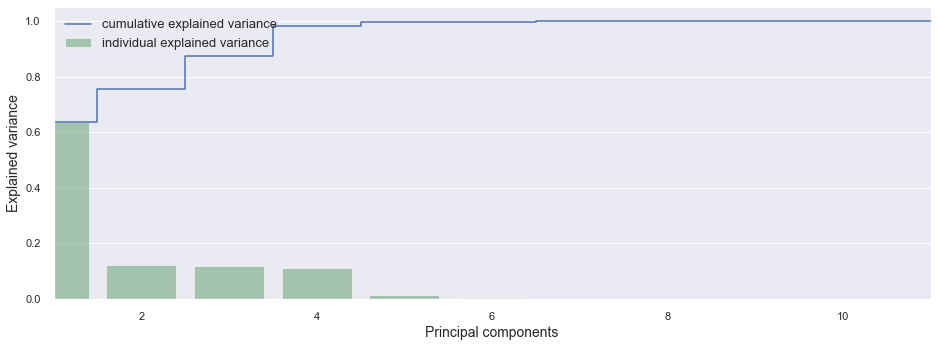

In [44]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(base_fision5.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,base_fision5.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

On voit que le nombre de composantes nécessaires pour expliquer les données n'est pas de trop eleve pres que 4 a 5 component principal permet d'expliquer l'ensemble des données. si on regrade bien au 5ieme componentes on obtient 100% de la variance.

In [31]:
base_fision5
pca = PCA(n_components=10)
matrix_9D = pca.fit_transform(base_fision5)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

on fait un visialisation de 10 componentes principales en fonction des clusters

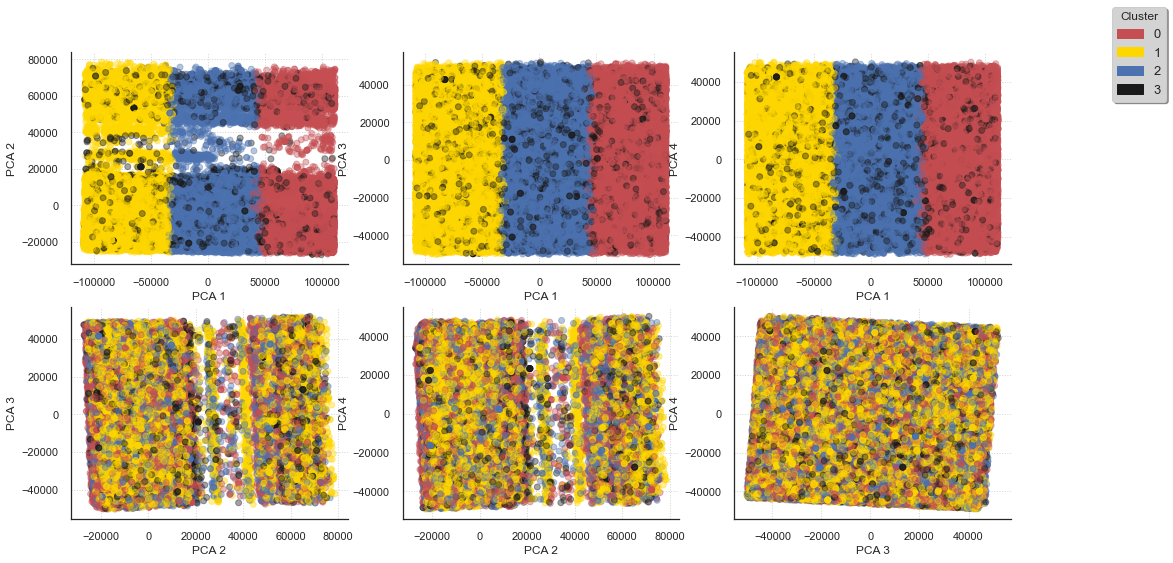

In [33]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g',6:'r', 7:'b', 8:'k'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(4):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

# LA DETECTION D'ANOMALIE 

## ISOLATION FOREST

In [34]:
model=IsolationForest(contamination=0.01)
model.fit(data_reduct)

IsolationForest(contamination=0.01)

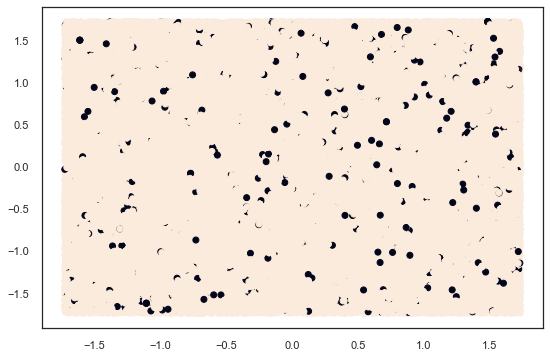

In [35]:
plt.scatter(data_reduct[:,0],data_reduct[:,1],c=model.predict(data_reduct))

In [27]:
n_clusters = 4
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(data_reduct)
clusters_clients = kmeans.predict(data_reduct)
silhouette_avg = silhouette_score(data_reduct, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.086


In [28]:
pca = PCA(n_components=2)
matrix_3D = pca.fit_transform(data_reduct)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

cependant nous allons ajouter la preduction des clusters dans notre base et c'est a travers cette preduction de clusters que nous allons  faire la préduction des models.

In [29]:
base_fision5['clusters']= clusters_clients

In [30]:
base_fision_predict=base_fision5

##  Classification des clients

Dans cette partie, l'objectif sera d'ajuster un classificateur qui permettra de classer les consommateurs dans les différentes catégories de clients qui ont été établies dans la section précédente. L'objectif est de rendre cette classification possible dès la première visite. Pour atteindre cet objectif,nous allons testé plusieurs classifieurs implémentés dans `scikit-learn`. Tout d'abord, afin de simplifier leur utilisation, on définit une classe qui permet d'interfacer plusieurs des fonctionnalités communes à ces différents classificateurs : 

Puisnous sommes en apprentissage  non supervisé nous allons faire des préductions en fonction des preduction des nombres de clusters et de voire en fonction des different models que nous avons opter quel est le model que nous allons retenir
Et cest la preduction de clusters qui va constutuer notr variable target

In [32]:
y= base_fision_predict['clusters']
x= base_fision_predict.drop('clusters',axis=1)               

In [33]:
model= KNeighborsClassifier(n_neighbors=1)

In [55]:
model.fit(x,y)
model.score(x,y)

1.0

In [35]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=5)
print('x_train set', x_train.shape)
print('x_test set',x_test.shape)

x_train set (90572, 33)
x_test set (22644, 33)


nous avons scindé la base en train qui occupe 80% et en test qui constutue les 20% 

In [58]:
model= KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
print('train score:',model.score(x_train,y_train))

train score: 1.0


In [332]:
print('test score:',model.score(x_test,y_test))

test score: 0.9371577459812754


# la cross validation 

Classificateur par machine à vecteur de support (SVC)

Le premier classificateur que on utilise est le classificateur SVC. Pour l'utiliser, on crée une instance de la classe `Class_Fit` et j'appelle ensuite` grid_search()`. Lors de l'appel de cette méthode, on fournit comme paramètres
- les hyperparamètres pour lesquels je vais chercher une valeur optimale
- le nombre de plis à utiliser pour la validation croisée

In [39]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))
        

## learning curve

In [354]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

Une fois cette instance créée,on ajuste le classificateur aux données d'entraînement :

In [355]:
svc.grid_fit(X = x_train, Y = y_train)

on peut alors tester la qualité de la prédiction par rapport aux données de test :

In [356]:
svc.grid_predict(x_test, y_test)

Precision: 79.24 % 


la courbe d'apprentissage avec la méthode du KNeighborsClassifier

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(KNeighborsClassifier(),x_train,y_train, cv=5, scoring='accuracy')

array([0.93, 0.94, 0.94, 0.93, 0.94])

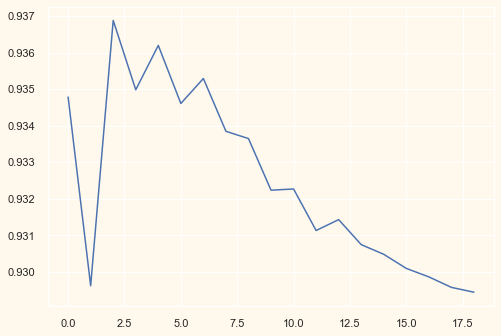

In [ ]:
val_score=[]
for k in range(1,20):
    score= cross_val_score(KNeighborsClassifier(k),x_train,y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

dans cette algorithme on peut se comfronter avec des cas d'overfiting si le nombre de vosin est egale a 1
cepandant nous allons tester d'autre avec les disttance comme euclidient ou la distance de manhatane
GridSearchCv permet de trouver le meilleur hyperparametre avec les mmeilleur performance de chaque conbianaison grace au technique de cross validation 

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

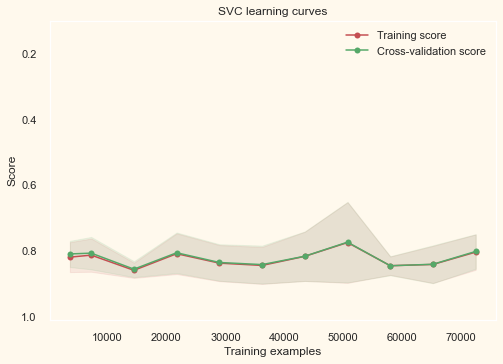

In [ ]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", x_train, y_train, ylim = [1.01, 0.1],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

In [ ]:
from sklearn.model_selection import GridSearchCV
para_grid= {'n_neighbors': np.arange(1,20),
            'metric':['euclidean','manhattan']}
grid= GridSearchCV(KNeighborsClassifier(), para_grid, cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
grid.best_score_

0.9392196043879608

In [ ]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [ ]:
model=grid.best_estimator_

In [ ]:
model.score(x_test, y_test)

0.9402932344108814

## Matrice de confusion

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(x_test))

array([[ 726,  230,  133,  248],
       [ 103, 7171,    0,  124],
       [  47,    0, 6337,  138],
       [ 106,  142,  150, 6989]], dtype=int64)

###  Logistic Regression

In [ ]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = x_train, Y = y_train)
lr.grid_predict(x_test, y_test)

Precision: 83.71 % 


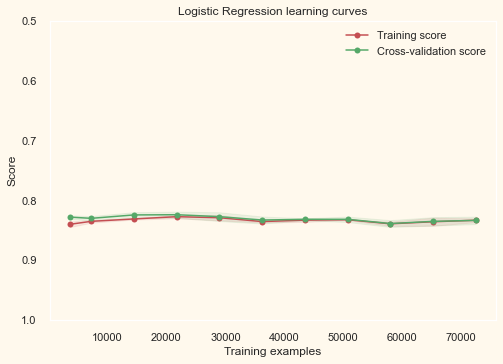

In [ ]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", x_train, y_train,
                        ylim = [1, 0.5], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### k-Nearest Neighbors

In [40]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = x_train, Y = y_train)
knn.grid_predict(x_test, y_test)

Precision: 93.73 % 


[14491 28982 43474 57965 72457]


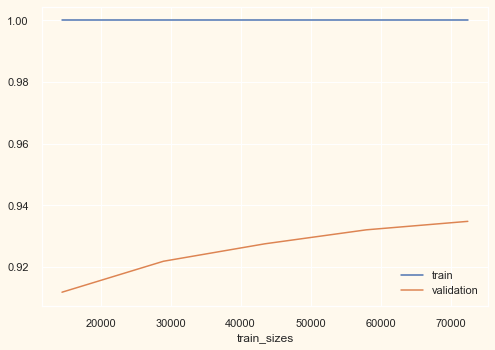

In [ ]:
N,train_score,val_score= learning_curve(model,x_train,y_train,train_sizes=np.linspace(0.2,1.0,5), cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

# VOTING ESTIMATORS

# BAGGING

In [340]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
model= BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9385267620561738

# RandomForestClassifier

In [341]:
model= RandomForestClassifier(n_estimators=50)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9855149266913973

# BOOSTING

In [351]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [352]:
model= AdaBoostClassifier(n_estimators=50)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6377406818583289

# Resumer des different clusters et decision final 

In [ ]:
______________________________ 
LinearSVC
Precision: 79.54 % 
______________________________ 
Logostic Regression
Precision: 83.71 %  % 
______________________________ 
k-Nearest Neighbors
Precision: 93.73 %  
______________________________ 
KNeighbors avec manhattan 
Precision: 94.02 % 
______________________________ 
Random Forest
Precision: 98.55 % 
______________________________ 
Gradient Boosting
Precision: 93.85 % 
______________________________ 
Baggin
Precision: 93.858 % 
______________________________ 